# 01.Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r'C:\Users\carol\Documents\DA\02 Data Inmersion\06 Advanced Analytics & Dashboard Design\Olist Analysis'

In [4]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'units_sold_max_items_1_min_units_3.csv'), index_col = False)

In [5]:
# Check dataset

df.head()

,Unnamed: 0,product_id,units_sold,product_photos_qty,product_name_length,product_description_length,review_score,item_price
0,6,001795ec6f1b187d37335e1c4704762e,9,1,53,274,3.222222,38.900000
1,8,001b72dfd63e9833e8c02742adf472e3,13,3,45,520,3.384615,34.990000
2,10,00210e41887c2a8ef9f791ebc780cc36,7,6,56,3893,4.000000,33.485000
3,11,002159fe700ed3521f46cfcf6e941c76,7,3,55,344,3.428571,202.700000
4,13,00250175f79f584c14ab5cecd80553cd,11,2,53,631,4.454545,75.444545


In [6]:
# Drop columns

df = df.drop(columns = ['Unnamed: 0','product_id'])

# 02. The elbow technique

In [7]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [8]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\carol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carol\anaconda3\Lib\site-packages\sklearn\clust

[-3853325451.328692,
 -1553642546.317247,
 -886839442.3318058,
 -611170560.8458006,
 -479157334.9650706,
 -395777789.5869255,
 -332646856.3770476,
 -296301654.3199504,
 -258163550.60729682]

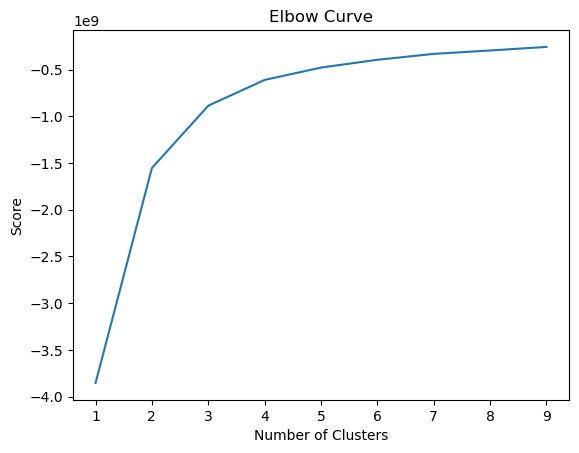

In [9]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### There's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

In [11]:
# Create the k-means object.

# kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [13]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\carol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [14]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\carol\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
df.head()

,units_sold,product_photos_qty,product_name_length,product_description_length,review_score,item_price,clusters
0,9,1,53,274,3.222222,38.900000,0
1,13,3,45,520,3.384615,34.990000,0
2,7,6,56,3893,4.000000,33.485000,1
3,7,3,55,344,3.428571,202.700000,0
4,11,2,53,631,4.454545,75.444545,0


In [16]:
df['clusters'].value_counts()

0    5142
2    2486
1     602
Name: clusters, dtype: int64

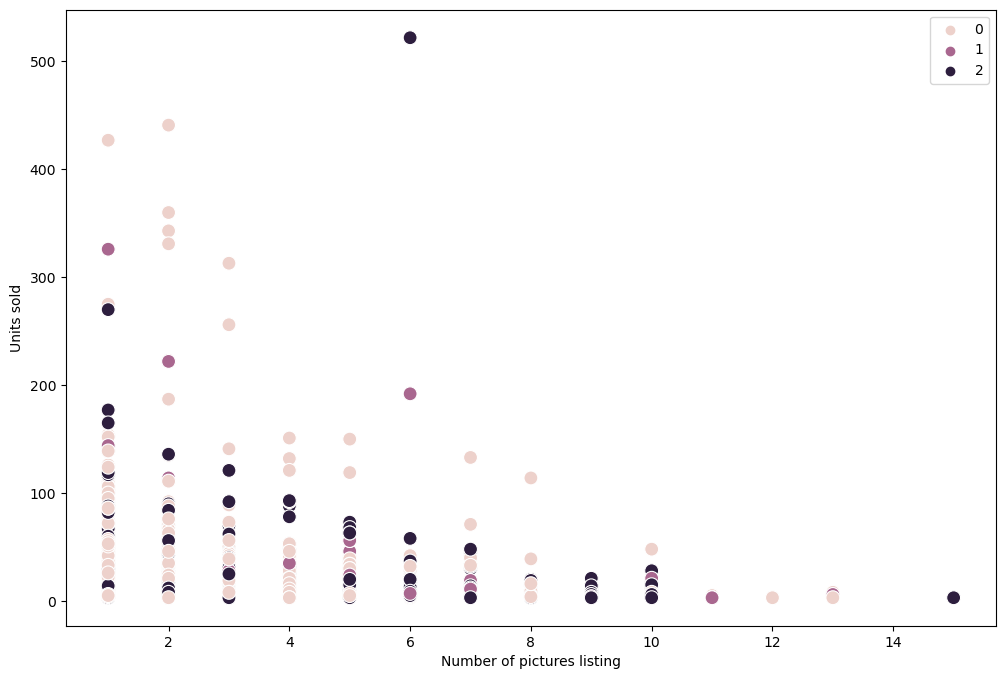

In [17]:
# Plot the clusters for "Number of product pictures on the listing" and "Units Sold"

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['product_photos_qty'], y=df['units_sold'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of pictures listing') # Label x-axis.
plt.ylabel('Units sold') # Label y-axis.
plt.show()

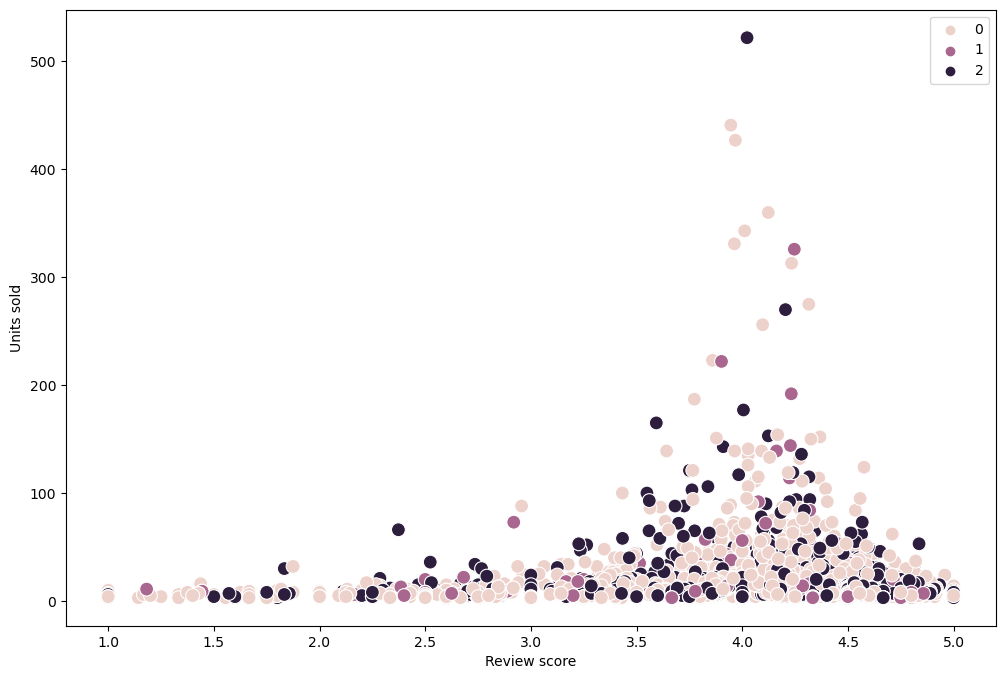

In [18]:
# Plot the clusters for the "Review score" and "Units Sold"

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['review_score'], y=df['units_sold'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Review score') 
plt.ylabel('Units sold') 
plt.show()

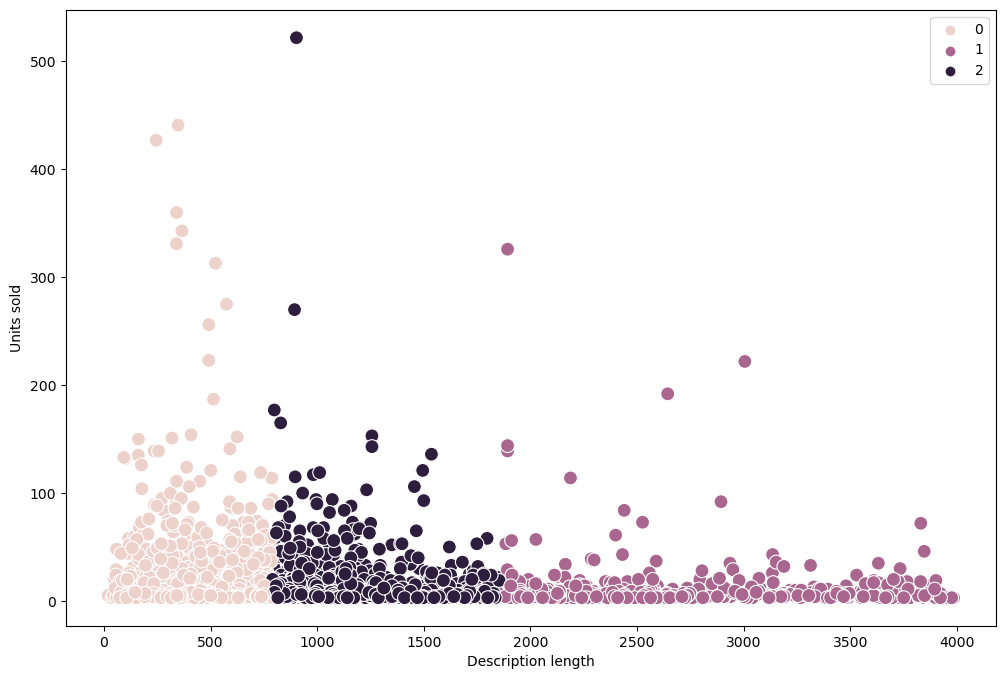

In [19]:
# Plot the clusters for the "Description length" and "Units Sold"

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['product_description_length'], y=df['units_sold'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Description length') 
plt.ylabel('Units sold') 
plt.show()

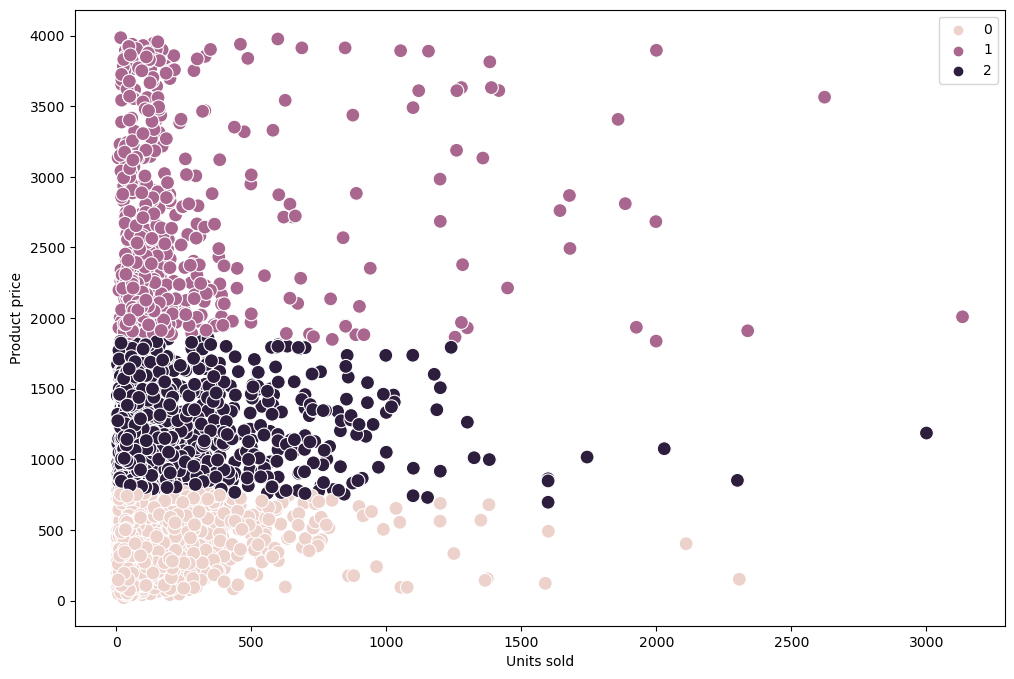

In [20]:
# Plot the clusters for the "Product price" and "Units Sold"

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['item_price'], y=df['product_description_length'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Units sold') 
plt.ylabel('Product price') 
plt.show()

In [21]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [22]:
df.groupby('cluster').agg({'units_sold':['mean', 'median'], 
                         'product_photos_qty':['mean', 'median'], 
                         'product_name_length':['mean', 'median'],
                          'product_description_length':['mean', 'median'],
                          'review_score':['mean', 'median'],
                          'item_price':['mean', 'median'],})

units_sold        product_photos_qty        product_name_length  \
                  mean median               mean median                mean   
cluster                                                                       
dark purple   9.154063    5.0           2.443685    2.0           49.407482   
pink          9.031894    5.0           2.091015    1.0           48.217814   
purple        9.976744    5.0           2.697674    2.0           51.088040   

                   product_description_length         review_score            \
            median                       mean  median         mean    median   
cluster                                                                        
dark purple   52.0                1144.804103  1080.0     4.092568  4.272727   
pink          51.0                 427.149164   417.0     4.077568  4.250000   
purple        54.0                2597.122924  2365.5     4.029500  4.200000   

             item_price              
                   mean      median  
cluster                              
dark purple  148.532698   90.060714  
pink          98.034811   60.000000  
purple       231.422427  119.000000

### Even though the clusters don't reveal any relationship between units sold and any other variables, they do show some trends in the data that weren't visible before. There seems to be a relationship between price and the length of the product description. units_sold, product_photos_qty, product_name_length, product_description_length and review_score have very similar stats across all clusters.

### The purple cluster has the longest product description length and highest price, while the pink has the shortest production description and lowest product price.

### Knowing this information would lead to asking the client if there's a length requirement depending on the product price. If not, a further analysis could be made to make suggestions on best listing practices. It'd be interesting to add more product variables to see if they lead to more units sold and to look at a larger period of time.